In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# --- FIX IS HERE ---
# Use '../src' because your notebook is inside the 'notebooks' folder
# and the 'src' folder is one level up.
sys.path.append(os.path.abspath('../src'))

# 2. Reload extension
%load_ext autoreload
%autoreload 2

# 3. Import Modules
try:
    # Remember: Import the FILENAME, not the function name
    import data_fetcher       # File is src/data_fetcher.py
    import data_processor    # File is src/processed_data.py
    import feature_generator  # File is src/feature_generator.py
    import labeler            # File is src/labeler.py
    
    print("✅ Modules imported successfully!")
    print(f"Python found them at: {os.path.abspath('../src')}")
    
except ImportError as e:
    print(f"❌ Import Error: {e}")
    print("Check if the file exists in the folder printed above.")

✅ Modules imported successfully!
Python found them at: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\src


In [9]:
import os
import sys
import importlib

# ==========================================
# PART 1: DEFINING THE CONTENT OF THE FILE
# ==========================================
labeler_code = """
import pandas as pd
import numpy as np
import os

def create_labels(threshold=0.02):
    # --- ROBUST PATH SETUP ---
    # Get the directory where THIS script is located (src/)
    current_script_dir = os.path.dirname(os.path.abspath(__file__))
    
    # Go up one level to the project root (Crypto_Classifier/)
    project_root = os.path.dirname(current_script_dir)
    
    # Define paths
    input_path = os.path.join(project_root, 'data', 'feature_engineered', 'feature_engineered_data.csv')
    output_dir = os.path.join(project_root, 'data', 'labeled')
    output_path = os.path.join(output_dir, 'labeled_data.csv')

    print(f" Starting Label Generation...")
    
    if not os.path.exists(input_path):
        print(f" Error: File not found at {input_path}")
        return None

    # LOAD
    df = pd.read_csv(input_path)
    
    # CALCULATE FUTURE RETURNS
    df['future_return'] = df['close'].pct_change().shift(-1)

    # APPLY LABELS (2=Buy, 0=Sell, 1=Hold)
    conditions = [
        (df['future_return'] > threshold),
        (df['future_return'] < -threshold)
    ]
    df['label'] = np.select(conditions, [2, 0], default=1)

    # CLEANUP & SAVE
    df = df.dropna(subset=['future_return'])
    
    os.makedirs(output_dir, exist_ok=True)
    df.to_csv(output_path, index=False)

    print(f" Labels Generated. Saved to: {output_path}")
    print("--- Class Distribution ---")
    print(df['label'].value_counts().sort_index())
    
    return df
"""

# ==========================================
# PART 2: WRITING THE FILE TO DISK (Fixed Encoding)
# ==========================================
# This determines where to save the file
if os.path.exists("../src"):
    file_path = "../src/labeler.py"
else:
    file_path = "src/labeler.py"

# --- FIX IS HERE: Added encoding="utf-8" ---
with open(file_path, "w", encoding="utf-8") as f:
    f.write(labeler_code)
print(f"✅ Successfully created/updated {file_path}")

# ==========================================
# PART 3: RUNNING THE CODE
# ==========================================
# Ensure Python sees the src folder
sys.path.append(os.path.abspath('../src'))

import labeler
importlib.reload(labeler) # Force Python to read the new file we just wrote

print("\n--- Running Labeler ---")
df_final = labeler.create_labels()

print(f"\n Pipeline Complete. Final Dataset Shape: {df_final.shape}")
df_final.head()

✅ Successfully created/updated ../src/labeler.py

--- Running Labeler ---
 Starting Label Generation...
 Labels Generated. Saved to: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\data\labeled\labeled_data.csv
--- Class Distribution ---
label
0    117
1    537
2    146
Name: count, dtype: int64

 Pipeline Complete. Final Dataset Shape: (800, 20)


,open_time,open,high,low,close,volume,rsi,macd,macd_signal,macd_hist,sma_20,sma_50,sma_200,bb_high,bb_low,volatility,pct_change_1d,pct_change_7d,future_return,label
0,2023-09-21,27125.01,27159.60,26377.70,26568.08,34476.82662,49.842110,-1.412210,-177.374545,175.962335,26211.3945,27101.2236,27792.99490,27211.242676,25211.546324,0.012822,-0.020532,0.001710,0.000454,1
1,2023-09-22,26568.08,26743.38,26468.77,26580.14,18198.22920,50.002520,0.035583,-141.892519,141.928102,26246.9260,27048.9536,27813.84560,27246.157741,25247.694259,0.012822,0.000454,-0.000747,-0.000157,1
2,2023-09-23,26580.14,26632.81,26509.00,26575.96,9440.70260,49.942902,0.836040,-113.346807,114.182847,26277.1635,26998.1930,27835.73560,27277.791132,25276.535868,0.012813,-0.000157,0.000613,-0.012326,1
3,2023-09-24,26575.97,26738.54,26122.08,26248.38,15706.65771,45.376798,-24.678086,-95.613063,70.934977,26298.2815,26941.7180,27858.45030,27277.531920,25319.031080,0.013087,-0.012326,-0.010522,0.002150,1
4,2023-09-25,26248.39,26446.15,25990.46,26304.81,26266.20390,46.287806,-39.885016,-84.467454,44.582438,26323.9170,26886.0458,27888.16325,27275.267225,25372.566775,0.013079,0.002150,-0.017102,-0.003161,1


In [10]:
# Import all your modules
import sys
import os
import importlib

# Point to src folder
sys.path.append(os.path.abspath('../src'))

import data_fetcher
import data_processor
import feature_generator
import labeler

# Force reload to ensure latest changes are used
importlib.reload(data_fetcher)
importlib.reload(data_processor)
importlib.reload(feature_generator)
importlib.reload(labeler)

print("STARTING PIPELINE...\n")

# 1. Fetch
print("--- 1. Fetching Data ---")
data_fetcher.fetch_binance_data()

# 2. Clean
print("\n--- 2. Cleaning Data ---")
data_processor.clean_raw_data()

# 3. Features
print("\n--- 3. Generating Features ---")
feature_generator.feature_generator()

# 4. Labels
print("\n--- 4. Generating Labels ---")
df_final = labeler.create_labels()

# 5. Success
print(f"\n Pipeline Complete! Final Dataset Shape: {df_final.shape}")
df_final.head()

STARTING PIPELINE...

--- 1. Fetching Data ---
Fetching 1000 rows of 1d data for BTCUSDT...
✅ Data saved to c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\data\raw\raw_data.csv

--- 2. Cleaning Data ---
Reading raw data from: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\data\raw\raw_data.csv
Cleaning data types...
✅ Successfully cleaned data.
   Rows: 1000
   Saved to: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\data\processed\processed_data.csv

--- 3. Generating Features ---
🚀 Starting feature engineering...
   Reading from: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\data\processed\processed_data.csv
   Calculating technical indicators...
✅ Features generated.
   Dropped 199 rows (warmup for indicators).
   Saved to: c:\Users\atien\Downloads\Data Science Class\Capstone_Project\Crypto_Classifier\data\feature_engineered\feature_engineered_data.csv

--

,open_time,open,high,low,close,volume,rsi,macd,macd_signal,macd_hist,sma_20,sma_50,sma_200,bb_high,bb_low,volatility,pct_change_1d,pct_change_7d,future_return,label
0,2023-09-21,27125.01,27159.60,26377.70,26568.08,34476.82662,49.842110,-1.412210,-177.374545,175.962335,26211.3945,27101.2236,27792.99490,27211.242676,25211.546324,0.012822,-0.020532,0.001710,0.000454,1
1,2023-09-22,26568.08,26743.38,26468.77,26580.14,18198.22920,50.002520,0.035583,-141.892519,141.928102,26246.9260,27048.9536,27813.84560,27246.157741,25247.694259,0.012822,0.000454,-0.000747,-0.000157,1
2,2023-09-23,26580.14,26632.81,26509.00,26575.96,9440.70260,49.942902,0.836040,-113.346807,114.182847,26277.1635,26998.1930,27835.73560,27277.791132,25276.535868,0.012813,-0.000157,0.000613,-0.012326,1
3,2023-09-24,26575.97,26738.54,26122.08,26248.38,15706.65771,45.376798,-24.678086,-95.613063,70.934977,26298.2815,26941.7180,27858.45030,27277.531920,25319.031080,0.013087,-0.012326,-0.010522,0.002150,1
4,2023-09-25,26248.39,26446.15,25990.46,26304.81,26266.20390,46.287806,-39.885016,-84.467454,44.582438,26323.9170,26886.0458,27888.16325,27275.267225,25372.566775,0.013079,0.002150,-0.017102,-0.003161,1


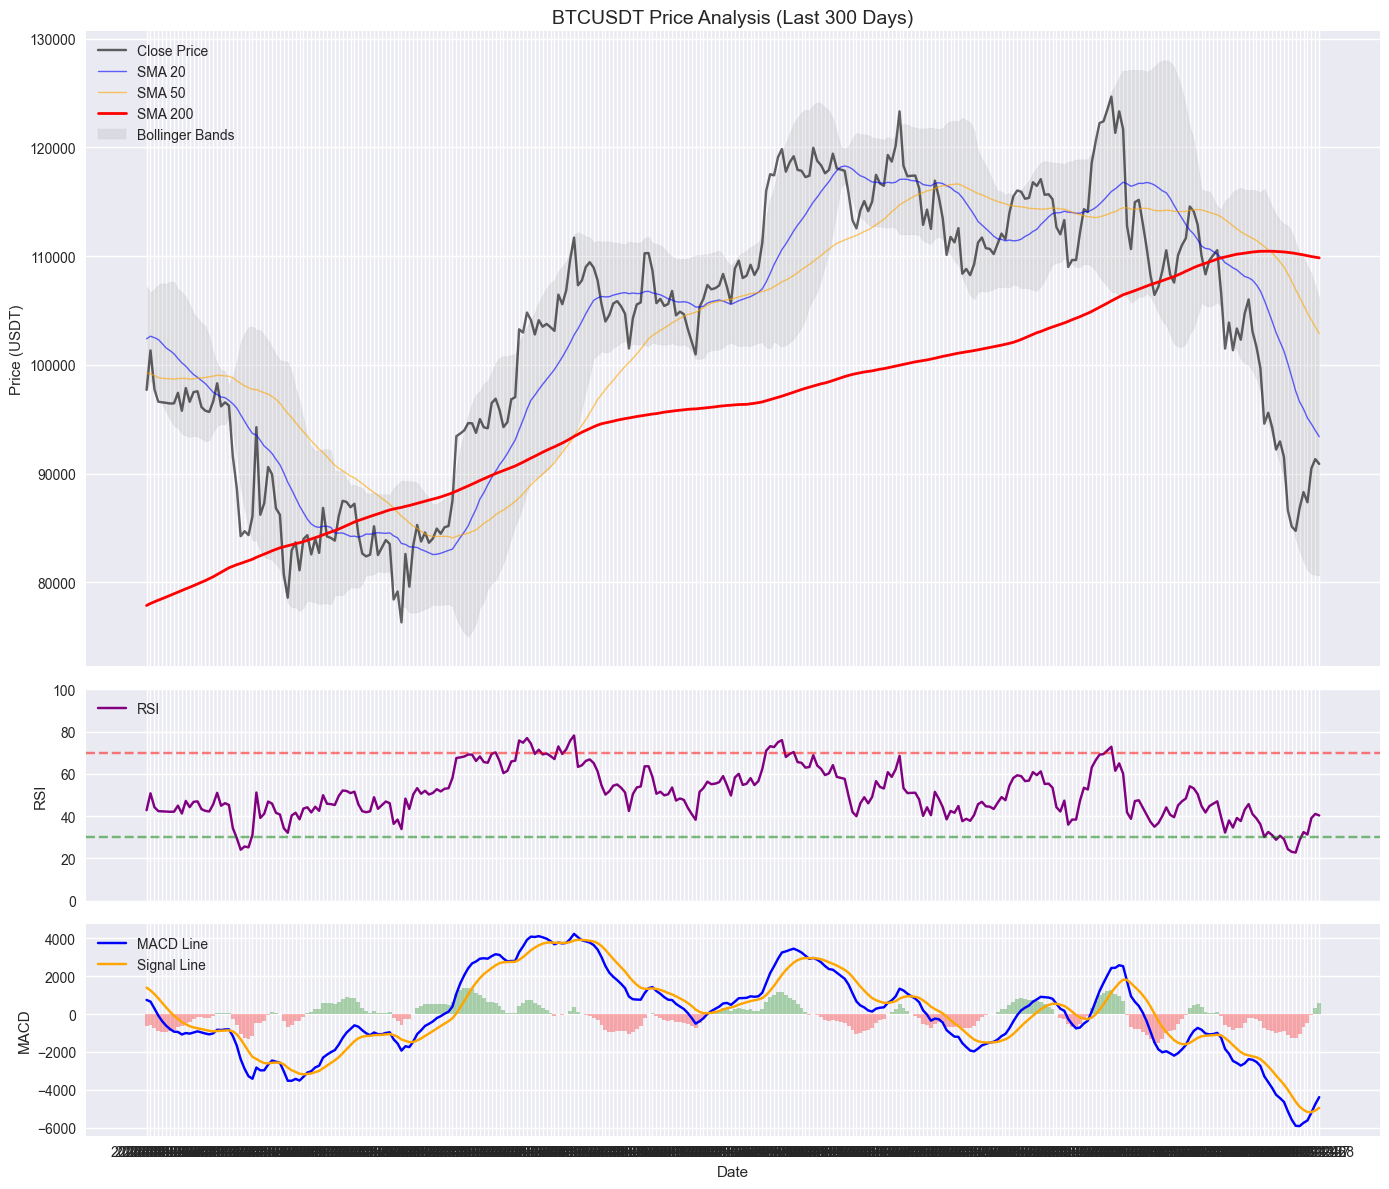

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
plt.style.use('seaborn-v0_8')

# 1. Select the last 300 days so the chart isn't too crowded
subset = df_final.tail(300).copy()

# 2. Create a figure with 3 stacked subplots (Price, RSI, MACD)
# height_ratios=[3, 1, 1] means the Price chart is 3x taller than indicators
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# --- TOP PANEL: PRICE & TRENDS ---
ax1.plot(subset['open_time'], subset['close'], label='Close Price', color='black', alpha=0.6)
ax1.plot(subset['open_time'], subset['sma_20'], label='SMA 20', color='blue', alpha=0.6, linewidth=1)
ax1.plot(subset['open_time'], subset['sma_50'], label='SMA 50', color='orange', alpha=0.6, linewidth=1)

# Check for SMA 200 (it might contain NaNs if data is short)
if 'sma_200' in subset.columns:
    ax1.plot(subset['open_time'], subset['sma_200'], label='SMA 200', color='red', linewidth=2)

# Bollinger Bands Shading
ax1.fill_between(subset['open_time'], subset['bb_high'], subset['bb_low'], color='gray', alpha=0.15, label='Bollinger Bands')

ax1.set_title('BTCUSDT Price Analysis (Last 300 Days)', fontsize=14)
ax1.set_ylabel('Price (USDT)')
ax1.legend(loc='upper left')
ax1.grid(True)

# --- MIDDLE PANEL: RSI (MOMENTUM) ---
ax2.plot(subset['open_time'], subset['rsi'], color='purple', label='RSI')
ax2.axhline(70, color='red', linestyle='--', alpha=0.5)   # Overbought
ax2.axhline(30, color='green', linestyle='--', alpha=0.5) # Oversold
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left')
ax2.grid(True)

# --- BOTTOM PANEL: MACD (TREND STRENGTH) ---
ax3.plot(subset['open_time'], subset['macd'], label='MACD Line', color='blue')
ax3.plot(subset['open_time'], subset['macd_signal'], label='Signal Line', color='orange')

# Color the histogram bars (Green if positive, Red if negative)
hist_colors = ['green' if x >= 0 else 'red' for x in subset['macd_hist']]
ax3.bar(subset['open_time'], subset['macd_hist'], color=hist_colors, alpha=0.3, width=1.0)

ax3.set_ylabel('MACD')
ax3.legend(loc='upper left')
ax3.grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

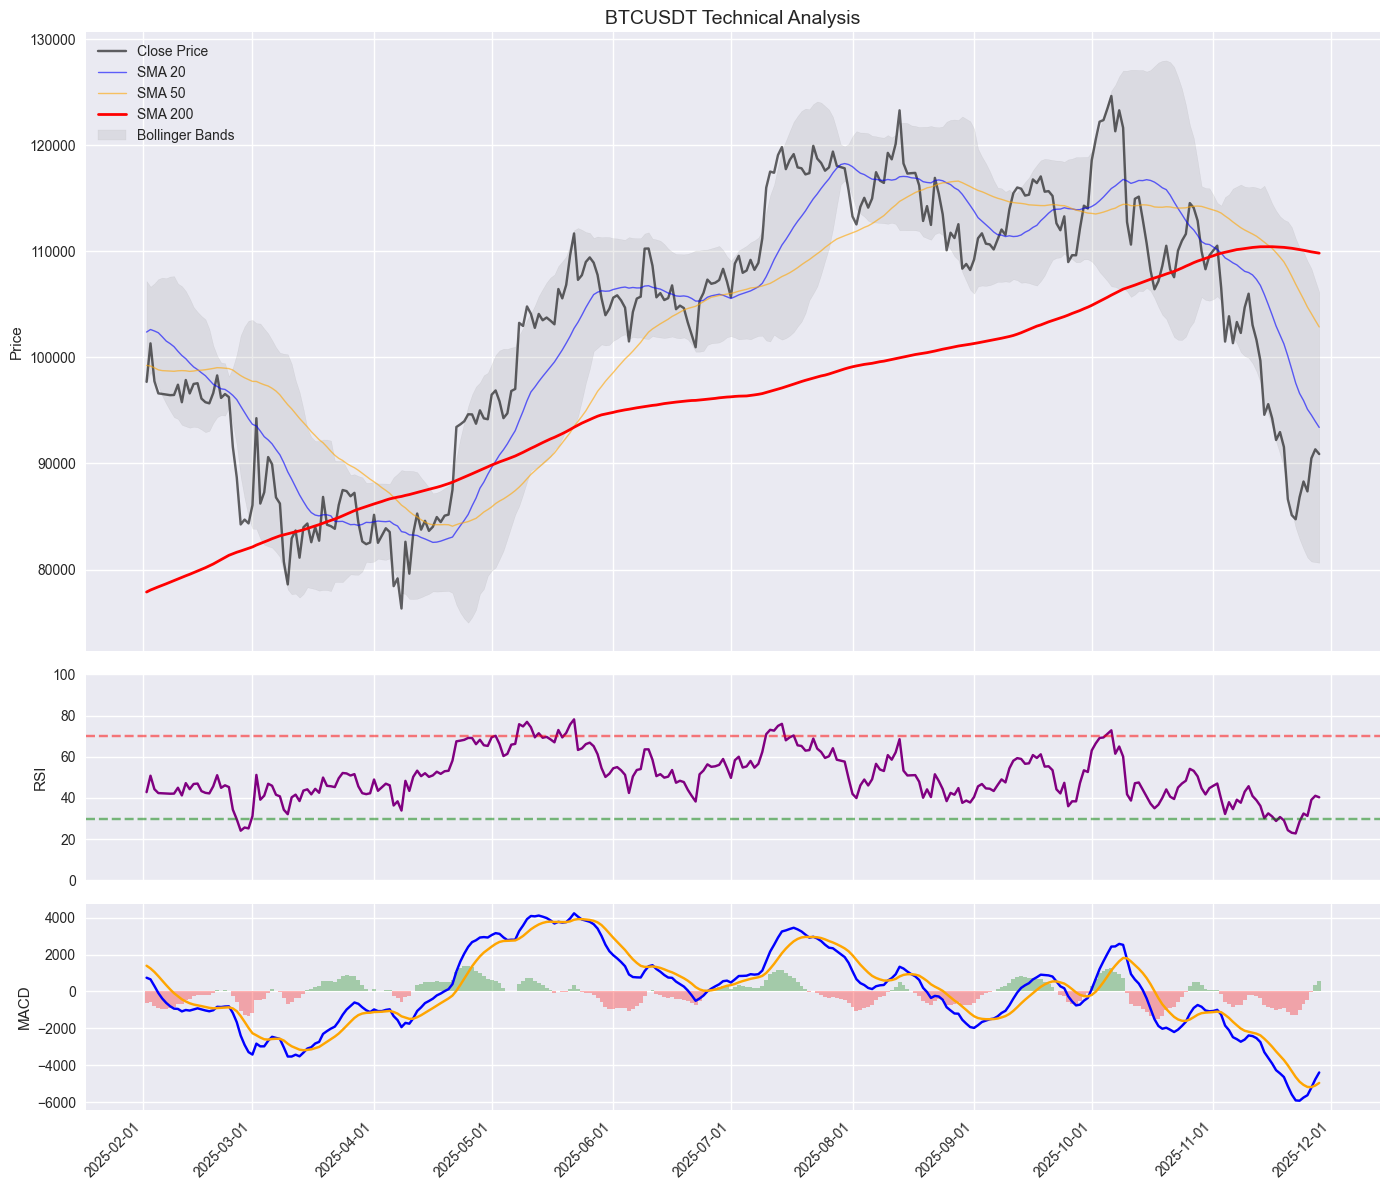

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')

# 1. PREPARE DATA
# Copy the last 300 days
subset = df_final.tail(300).copy()

# CRITICAL FIX: Force conversion to datetime again just to be 100% sure
subset['open_time'] = pd.to_datetime(subset['open_time'])

# 2. PLOT SETUP
# sharex=True hides the X-axis labels for the top charts to look cleaner. 
# The labels will only appear on the BOTTOM chart.
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# --- CHART 1: PRICE ---
ax1.plot(subset['open_time'], subset['close'], label='Close Price', color='black', alpha=0.6)
ax1.plot(subset['open_time'], subset['sma_20'], label='SMA 20', color='blue', alpha=0.6, linewidth=1)
ax1.plot(subset['open_time'], subset['sma_50'], label='SMA 50', color='orange', alpha=0.6, linewidth=1)

if 'sma_200' in subset.columns:
    ax1.plot(subset['open_time'], subset['sma_200'], label='SMA 200', color='red', linewidth=2)

ax1.fill_between(subset['open_time'], subset['bb_high'], subset['bb_low'], color='gray', alpha=0.15, label='Bollinger Bands')
ax1.set_title('BTCUSDT Technical Analysis', fontsize=14)
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')
ax1.grid(True)

# --- CHART 2: RSI ---
ax2.plot(subset['open_time'], subset['rsi'], color='purple', label='RSI')
ax2.axhline(70, color='red', linestyle='--', alpha=0.5)
ax2.axhline(30, color='green', linestyle='--', alpha=0.5)
ax2.set_ylabel('RSI')
ax2.set_ylim(0, 100)
ax2.grid(True)

# --- CHART 3: MACD ---
ax3.plot(subset['open_time'], subset['macd'], label='MACD', color='blue')
ax3.plot(subset['open_time'], subset['macd_signal'], label='Signal', color='orange')
hist_colors = ['green' if x >= 0 else 'red' for x in subset['macd_hist']]
ax3.bar(subset['open_time'], subset['macd_hist'], color=hist_colors, alpha=0.3, width=1.0)
ax3.set_ylabel('MACD')
ax3.grid(True)

# --- CRITICAL FIX: FORMATTING THE DATE AXIS ---
# We apply this to ax3 because it is the bottom chart
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format: 2023-01-01
ax3.xaxis.set_major_locator(mdates.AutoDateLocator()) # Let matplotlib pick best spacing

# Rotate dates to prevent overlapping
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

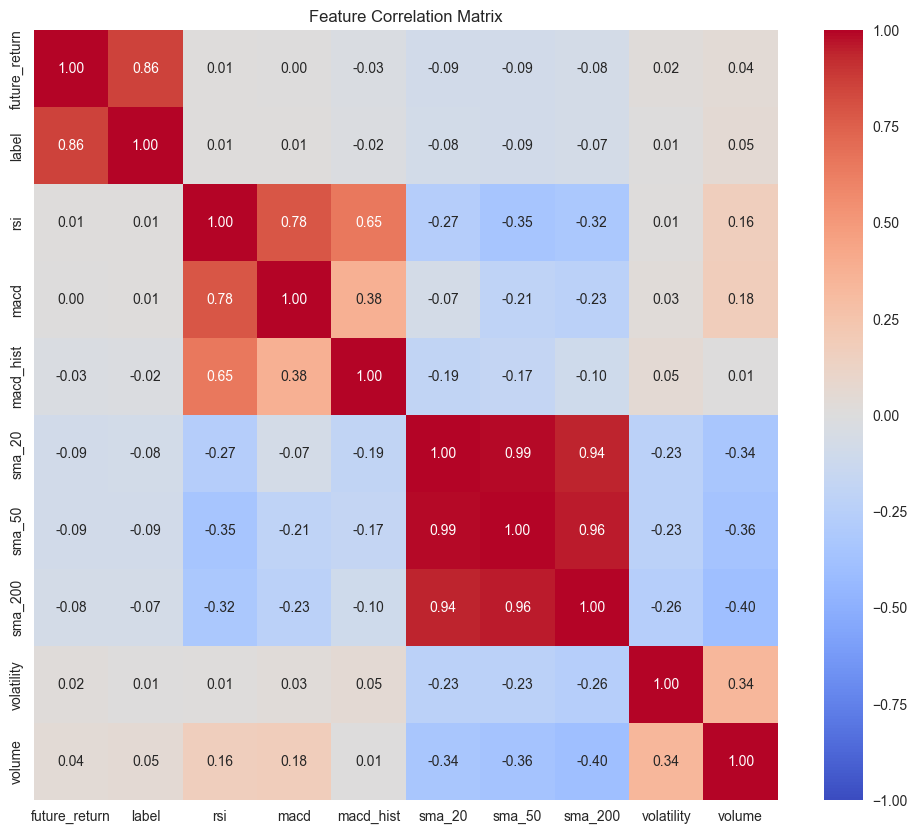

In [13]:
# Select only numeric columns for correlation
# We exclude 'open_time' because it's a date
numeric_cols = [
    'future_return', 'label', 'rsi', 'macd', 'macd_hist', 
    'sma_20', 'sma_50', 'sma_200', 'volatility', 'volume'
]

# Filter columns that actually exist in your dataframe
existing_cols = [col for col in numeric_cols if col in df_final.columns]

plt.figure(figsize=(12, 10))
sns.heatmap(df_final[existing_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

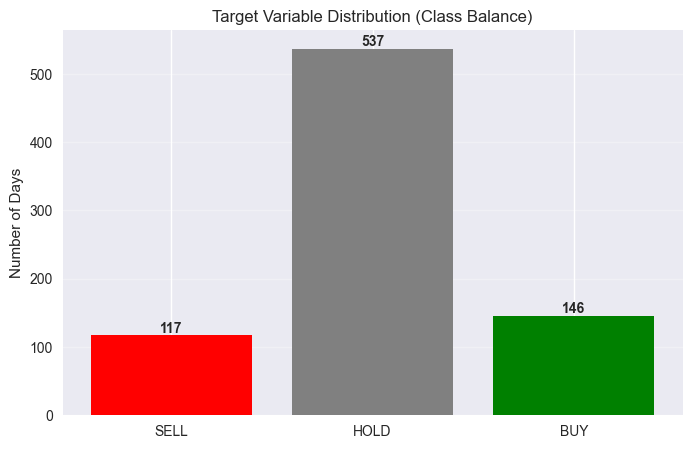

Total Samples: 800


In [14]:
# Map the numeric labels to names for better reading
label_map = {0: 'SELL', 1: 'HOLD', 2: 'BUY'}
label_counts = df_final['label'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
# Colors: Red for Sell, Gray for Hold, Green for Buy
colors = ['red', 'gray', 'green'] 

bars = plt.bar([label_map[i] for i in label_counts.index], label_counts.values, color=colors)

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.title('Target Variable Distribution (Class Balance)')
plt.ylabel('Number of Days')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Total Samples: {len(df_final)}")